# MAT281 - Tarea 2

**Indicaciones**:

* En los **Ejercicio 1-8** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente o cómodo, en ambos casos cada gráfico debe tener elementos mínimos como:
    - Título
    - Nombre de los ejes, leyendas, etc. en formato _amigable_/_humano_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `casos_confirmados` se espera que el eje del gráfico tenga por nombre `Casos confirmados`.
    - Colores adecuados al tipo de datos.
    - Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.
    - Cada vez que no se cumplan alguna de estos requerimientos se descontará __1 punto__ de la nota final.

* Para el **Ejercicio 9** es obligación utilizar `altair`.
* Cada ejercicio debe estar acompañado con una celda con comentarios o análisis que puedas desprender de los gráficos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from datetime import date
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
#alt.data_transformers.enable('data_server')
alt.data_transformers.disable_max_rows()
alt.themes.enable('opaque')

%matplotlib inline

**COVID-19 en Chile** 

En esta tarea exploraremos los datos de Covid-19 en Chile a profundidad. Las siguientes celdas cargarán los datos a utilizar en tu sesión. Es importante que leas la documentación de cada conjunto de datos para comprender las columnas.

In [2]:
start_date = pd.to_datetime("2020-04-13")

In [3]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto6
confirmados = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
    .dropna()
    .astype({"casos_confirmados": np.float, "tasa": np.float})
)

confirmados.head()

,poblacion,casos_confirmados,fecha,region_id,region,provincia_id,provincia,comuna_id,comuna,tasa
0,247552.0,270.0,2020-04-27,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,109.067994
1,247552.0,9138.0,2020-10-12,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,3691.345657
2,247552.0,596.0,2020-05-29,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,240.757497
3,247552.0,6131.0,2020-08-17,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2476.651370
4,247552.0,353.0,2020-05-11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,142.596303


In [4]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto19
activos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .loc[lambda x: x["codigo_comuna"].notnull()]
    .melt(id_vars=["region", "codigo_region", "comuna", "codigo_comuna", "poblacion"], var_name="fecha", value_name="casos_activos")
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
)

activos.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,fecha,casos_activos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0
4,Tarapaca,1,Alto Hospicio,1107.0,129999.0,2020-04-13,8.0


In [5]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto14
fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["region"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos.head()

,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0
375,Tarapacá,2020-04-13,0.0
376,Antofagasta,2020-04-13,1.0
377,Atacama,2020-04-13,0.0
378,Coquimbo,2020-04-13,0.0


In [6]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto10
fallecidos_etareo = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["grupo_de_edad"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
        grupo_de_edad=lambda x: x["grupo_de_edad"].str.replace("<=39", "0-39")
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos_etareo.head()

,grupo_de_edad,fecha,fallecidos
28,0-39,2020-04-13,3
29,40-49,2020-04-13,2
30,50-59,2020-04-13,3
31,60-69,2020-04-13,12
32,70-79,2020-04-13,29


## Ejercicio 1

(10 puntos)

Mostrar cantidad de fallecidos la fecha por cada grupo etáreo.

In [7]:
df = fallecidos_etareo.groupby("grupo_de_edad").agg({"fallecidos" : "sum"}).reset_index()

alt.Chart(df).mark_bar().encode(
    y = alt.Y('grupo_de_edad:N', axis = alt.Axis(title="Grupo de edad")),
    x = alt.X("fallecidos:Q", axis = alt.Axis(title = "Fallecidos"))
).properties(
    width = 900,
    height = 500,
    title = "Cantidad de fallecidos por grupo etario"
)

alt.Chart(...)

**Comentarios:** Los datos son coherentes con la idea de que el virus afecta más gravemente a la tercera edad. El grupo etario con mayor número de defunciones es 70-79, y el segundo es 80-89, la disminución de >=90 puede ser consecuencia de que la población en ese rango también disminuye por razones obvias.

## Ejercicio 2

(10 puntos)

¿Qué tan variable es la población de las comunas de Chile? Considera utilizar un gráfico que resuma de buena forma la información sin agregar la variable de región o provincia.

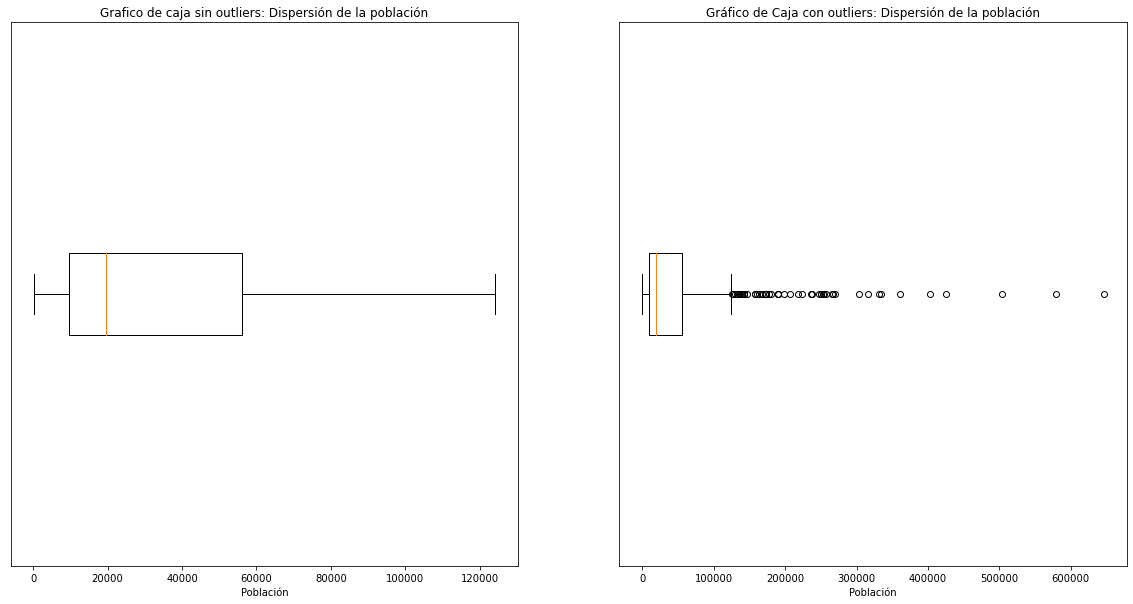

In [8]:
df2 = confirmados.drop_duplicates(subset = "comuna")

fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.boxplot(df2["poblacion"],vert=False, showfliers = False) 
plt.xlabel("Población")
plt.yticks([])
plt.title("Grafico de caja sin outliers: Dispersión de la población")

plt.subplot(1, 2, 2)
plt.boxplot(df2["poblacion"],vert=False) 
plt.xlabel("Población")
plt.yticks([])
plt.title("Gráfico de Caja con outliers: Dispersión de la población")

plt.show()

**Comentarios:** Se puede ver que la población de las comunas es muy variable 

## Ejercicio 3

(10 puntos)

Mostrar evolución y comparación de los fallecimientos entre distintos grupos etáreos, pero que al mismo tiempo sea fácil identificar la cantidad de fallecidos total en cada fecha.

In [9]:
scat = alt.Chart(fallecidos_etareo).mark_circle().encode(
    x = alt.X('fecha:T', axis = alt.Axis(title="Fecha")),
    y = alt.Y('fallecidos', axis = alt.Axis(title="Fallecidos")),
    color = alt.Color('grupo_de_edad', title = "Grupo de edad"),
    tooltip =[alt.Tooltip("grupo_de_edad", type = "nominal" , title = "Grupo de edad"),
                alt.Tooltip("fallecidos", type = "ordinal" , title = "Fallecidos"),
                alt.Tooltip("fecha", type = "temporal", title = "Fecha")
             ] 
).properties(
    width=1000,
    height=600,
    title = "Evolución en el tiempo de fallecidos por grupo de edad"
).interactive()

lines = alt.Chart(fallecidos_etareo).mark_line(opacity = 0.6).encode(
    x = alt.X('fecha:T', axis = alt.Axis(title="Fecha")),
    y = alt.Y('fallecidos', axis = alt.Axis(title="Fallecidos")),
    color = alt.Color('grupo_de_edad', title = "Grupo de edad")
)

scat + lines

alt.LayerChart(...)

 **Comentarios:** Se puede ver que la evolución en cada grupo etareo ha sido constante y mayormente creciente, además desde el 31 de mayo es claro que la cantidad de fallecidos por grupo etario tiene el mismo orden comparativo.

## Ejercicio 4

(10 puntos)

Mostrar en tres gráficos la evolución de casos confirmados, evolución de fallecimientos y evolución de casos activos.

In [10]:
conf_tot = confirmados.groupby("fecha").agg({"casos_confirmados":"sum"})
act_tot = activos.groupby("fecha").agg({"casos_activos":"sum"})
fall_tot = fallecidos.groupby("fecha").agg({"fallecidos":"sum"})

#Implementación en matplotlib
#fig = plt.figure(figsize=(20,30))
#
#plt.subplot(3,1,1)
#plt.plot(conf_tot.index, conf_tot.values)
#
#plt.subplot(3,1,2)
#plt.plot(act_tot.index, act_tot.values)
#
#plt.subplot(3,1,3)
#plt.plot(fall_tot.index, fall_tot.values)

#plt.show()

#Implementación con altair

confscat = alt.Chart(conf_tot.reset_index()).mark_circle().encode(
    x = alt.X('fecha:T', axis = alt.Axis(title="Fecha")),
    y = alt.Y( "casos_confirmados", axis = alt.Axis(title="Casos confirmados")),
    tooltip = alt.Tooltip(["casos_confirmados"], title ="Casos confirmados")
).properties(
    width=1000,
    height=600,
    title = "Evolución casos confirmados"
)

actscat = alt.Chart(act_tot.reset_index()).mark_circle().encode(
    x = alt.X('fecha:T', axis = alt.Axis(title="Fecha")),
    y = alt.Y( "casos_activos", axis = alt.Axis(title="Casos activos")),
    tooltip = alt.Tooltip(["casos_activos"], title ="Casos activos")
).properties(
    width=1000,
    height=600,
    title = "Evolución casos activos"
)

fallscat = alt.Chart(fall_tot.reset_index()).mark_circle().encode(
    x = alt.X('fecha:T', axis = alt.Axis(title="Fecha")),
    y = alt.Y( "fallecidos", axis = alt.Axis(title="Fallecidos")),
    tooltip = alt.Tooltip(["fallecidos"], title ="Fallecidos")
).properties(
    width=1000,
    height=600,
    title = "Evolución fallecimientos"
)
confline = alt.Chart(conf_tot.reset_index()).mark_line().encode(
    x = alt.X('fecha:T', axis = alt.Axis(title="Fecha")),
    y = alt.Y( "casos_confirmados", axis = alt.Axis(title="Casos confirmados")),
    tooltip = alt.Tooltip(["casos_confirmados"], title ="Casos confirmados")
).properties(
    width=1000,
    height=600
)

actline = alt.Chart(act_tot.reset_index()).mark_line().encode(
    x = alt.X('fecha:T', axis = alt.Axis(title="Fecha")),
    y = alt.Y( "casos_activos", axis = alt.Axis(title="Casos activos")),
    tooltip = alt.Tooltip(["casos_activos"], title ="Casos activos")
).properties(
    width=1000,
    height=600
)

fallline = alt.Chart(fall_tot.reset_index()).mark_line().encode(
    x = alt.X('fecha:T', axis = alt.Axis(title="Fecha")),
    y = alt.Y( "fallecidos", axis = alt.Axis(title="Fallecidos")),
    tooltip = alt.Tooltip(["fallecidos"], title ="Fallecidos")
).properties(
    width=1000,
    height=600
)

(confscat + confline) & (actscat + actline) & (fallscat + fallline)

alt.VConcatChart(...)

**Comentarios:** Los picks de casos activos corresponden a picks en los crecimientos de las curvas, para los casos confirmados el pick se corresponde sin delay, mientras que para los fallecidos se aprecia un delay de algunas semanas.

## Ejercicio 5

(10 puntos)

Comparar la tasa de incidencia entre las regiones a lo largo del tiempo.

In [11]:
df5 = confirmados.groupby(["region","fecha"]).apply(lambda df: df["casos_confirmados"].sum()/df["poblacion"].sum()*10**5).reset_index()
df5.columns = df5.columns[0:-1].append(pd.Index(["Tasa"]))
df5

,region,fecha,Tasa
0,Antofagasta,2020-04-13,21.536336
1,Antofagasta,2020-04-15,25.438893
2,Antofagasta,2020-04-17,30.497764
3,Antofagasta,2020-04-20,38.158340
4,Antofagasta,2020-04-24,53.190413
...,...,...,...
1067,Ñuble,2020-11-16,2103.602573
1068,Ñuble,2020-11-20,2154.623879
1069,Ñuble,2020-11-23,2197.239376
1070,Ñuble,2020-11-27,2247.283262


In [12]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['fecha'], empty='none')

# The basic line
line = alt.Chart(df5).mark_line(interpolate='basis').encode(
    x = alt.X('fecha:T', axis = alt.Axis(title="Fecha")),
    y = alt.Y( "Tasa:Q", axis = alt.Axis(title="Tasa")),
    color = alt.Color('region', title = "Region")
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(df5).mark_point().encode(
    x='fecha:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=20, dy=-20).encode(
    text=alt.condition(nearest, 'Tasa:Q', alt.value(' ')),
)

# Draw a rule at the location of the selection
rules = alt.Chart(df5).mark_rule(color='gray').encode(
    x='fecha:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=1000, 
    height=600,
    title = "Evolución de la tasa de incidencia por región"
).interactive()

alt.LayerChart(...)

**Comentarios:** Al ser la tasa de de casos acumulados respecto a la información es natural que se tengan comportamientos crecientes en el tiempo. Podemos comentar que la región más afectada respecto a su población total es la región de Magallanes practicamente, al menos, doblando al resto de las regiones. 

## Ejercicio 6

(10 puntos)

¿Hay alguna conclusión que puedas obtener rápidamente al graficar un _scatter plot_ con los casos confirmados y tasa de incidencia de cada comuna para los días 13 de abril y 6 de noviembre del 2020? Además, colorea cada punto según la región a la que pertenece y considera si es útil en el gráfico que el tamaño sea proporcional a la población.

In [13]:
df61 = confirmados.loc[(confirmados["fecha"] == pd.to_datetime("2020-11-06"))]
df62 = confirmados.loc[(confirmados["fecha"] == pd.to_datetime("2020-04-13"))] 

G116 = alt.Chart(df61).mark_circle().encode(
    x = alt.X('casos_confirmados:Q', axis = alt.Axis(title="Casos confirmados")),
    y = alt.Y('tasa:Q', axis = alt.Axis(title="Tasa")),
    color = alt.Color("region", title = "Región"),
    tooltip = [alt.Tooltip("tasa", title = "Tasa de incidencia"), 
               alt.Tooltip("casos_confirmados", title = "Casos confirmados"), 
               alt.Tooltip("region", title = "Región")]
).properties(
    width=500,
    height=300,
    title = "Casos confirmados vs Tasa de incidencia - Tamaño estandar - 13/04/2020 "
)

G413 = alt.Chart(df62).mark_circle().encode(
    x = alt.X('casos_confirmados:Q', axis = alt.Axis(title="Casos confirmados")),
    y = alt.Y('tasa:Q', axis = alt.Axis(title="Tasa")),
    color = alt.Color("region", title = "Región"),
    tooltip = [alt.Tooltip("tasa", title = "Tasa de incidencia"), 
               alt.Tooltip("casos_confirmados", title = "Casos confirmados"), 
               alt.Tooltip("region", title = "Región")]
).properties(
    width=500,
    height=300,
    title = "Casos confirmados vs Tasa de incidencia - Tamaño estandar - 6/11/2020  "
)

G116s = alt.Chart(df61).mark_circle().encode(
    x = alt.X('casos_confirmados:Q', axis = alt.Axis(title="Casos confirmados")),
    y = alt.Y('tasa:Q', axis = alt.Axis(title="Tasa")),
    color = alt.Color("region", title = "Región"),
    size = alt.Size("poblacion", title = "Población"),
    tooltip = [alt.Tooltip("tasa", title = "Tasa de incidencia"), 
               alt.Tooltip("casos_confirmados", title = "Casos confirmados"), 
               alt.Tooltip("region", title = "Región")]
).properties(
    width=500,
    height=300,
    title = "Casos confirmados vs Tasa de incidencia - Tamaño prop. población - 13/04/2020 "
)

G413s = alt.Chart(df62).mark_circle().encode(
    x = alt.X('casos_confirmados:Q', axis = alt.Axis(title="Casos confirmados")),
    y = alt.Y('tasa:Q', axis = alt.Axis(title="Tasa")),
    color = alt.Color("region", title = "Región"),
    size = alt.Size("poblacion", title = "Población"),
    tooltip = [alt.Tooltip("tasa", title = "Tasa de incidencia"), 
               alt.Tooltip("casos_confirmados", title = "Casos confirmados"), 
               alt.Tooltip("region", title = "Región")]
).properties(
    width=500,
    height=300,
    title = "Casos confirmados vs Tasa de incidencia - Tamaño prop. población - 6/11/2020 "
)

(G116 | G413) & (G116s | G413s)

alt.VConcatChart(...)

**Comentarios:**  Que tanto la tasa de incidencia como los casos confirmados han aumentado notablemente


## Ejercicio 7

(10 puntos)

1. Grafica la evolución de los casos activos de cada comuna en un solo gráfico. 
2. Grafica la evolución de los casos activos de cada comuna en gráficos separados por región.

Entrega los pros y contras de cada uno de estos enfoques.

In [14]:
alt.Chart(activos).mark_line().encode(
    y = alt.Y("casos_activos", title = "Casos activos"),
    x = alt.X("fecha:T", title = "Fecha"),
    color = alt.Color("comuna:N", title = "Comuna")
).properties(
    width = 1000, 
    height = 600, 
    title = "Evolución casos activos por comuna"
)

alt.Chart(...)

In [16]:
alt.Chart(activos).mark_line().encode(
    y = alt.Y("casos_activos", title = "Casos activos"),
    x = alt.X("fecha:T", title = "Fecha"),
    color = alt.Color("comuna:N", title = "Comuna"),
    column = alt.Column("region", title = "Región"),
    tooltip = [alt.Tooltip("comuna", title = "Comuna"), 
               alt.Tooltip("casos_activos", title = "Casos activos"), 
               alt.Tooltip("fecha", title = "Fecha")]
).properties(
    width=400, 
    height=600,
    title = "Evolución de casos activos por comuna agrupados por región"
).interactive(
    bind_x = False 
)

alt.Chart(...)

**Comentarios:** El primero permite hacer un análisis global páis perdiendo mucha información sobre comunas que debido a su baja población tengan tasas bastante altas de contagios. El segundo permite realizar un análisis global región a región y no se pierde tanta información sin embargo, sin embargo podemos notar que entre mayor cantidad de comunas posea la región más ilegible se vuelve la información con menor número de casos.

## Ejercicio 8

(10 puntos)

Hacer un gráfico que permita comparar rápidamente entre regiones su promedio de casos activos , máximo de casos confirmados y fallecidos. Utiliza los valores reales y apoyarlos con colores.

Se adjunta el diccionario `region_names` con tal de reemplazar los nombres de las regiones en los datos `fallecidos` para poder unir con los otros datos. 

In [17]:
region_names = {
    "Araucanía": "La Araucanía",
    "Aysén": "Aysén del General Carlos Ibáñez del Campo",
    "Magallanes": "Magallanes y de la Antártica Chilena",
    "Metropolitana": "Metropolitana de Santiago",
    "O’Higgins": "Libertador General Bernardo O'Higgins",
    "Aysen": "Aysén del General Carlos Ibáñez del Campo",
    "Biobio": "Biobío",
    "Del Libertador General Bernardo O’Higgins": "Libertador General Bernardo O'Higgins",
    "La Araucania" : "La Araucanía",
    "Los Rios" : "Los Ríos",
    "Magallanes y la Antartica" : "Magallanes y de la Antártica Chilena",
    "Nuble" : "Ñuble",
    "Tarapaca" : "Tarapacá",
    "Valparaiso" : "Valparaíso"
}

In [19]:
fall = fallecidos.replace(region_names).groupby("region").agg({"fallecidos":"max"}).drop(index = "Total")
act = activos.replace(region_names).groupby("region").agg({"casos_activos":"mean"})
conf = confirmados.groupby("region").agg({"casos_confirmados":"max"})

df8 = pd.concat([fall,act,conf], axis = 1)
df8.columns = pd.Index(["Máximo de fallecidos", "Máximo de casos confimados", "Promedio de casos activos"])
y_pos = np.arange(len(df8.index))

def f(Grafico):
    plt.figure(figsize = (20,10))
    plt.barh(y_pos, df8[Grafico])
    plt.ylabel("Región", size = 15)
    plt.xlabel(Grafico, size = 15)
    plt.yticks(y_pos, df8.index)
    plt.title(Grafico + " por región", size = 20)
    plt.grid()
    plt.show()
interactive(
    f,
    Grafico=widgets.Dropdown(options=df8.columns)
)

interactive(children=(Dropdown(description='Grafico', options=('Máximo de fallecidos', 'Máximo de casos confim…

**Comentarios:** RESPONDE AQUÍ

## Ejercicio 9


En este ejercicio buscaremos realizar un mini-dashboard respecto al estado de los casos de COVID-19 en Chile, por lo tanto utilizaremos haremos uso de datos geográficos de manera operacional (es decir, no nos preocuparemos de proyecciones en mapas ni nada por el estilo), lo único es que debes instalar `geopandas` en tu ambiente virtual y no olvidar actualizarlo en tu `environment.yml` para luego subirlo a tu repositorio de GitHub.

Con tu ambiente activo (`conda activate mat281`) basta con ejecutar `conda install -c conda-forge geopandas` para instalar `geopandas`.

In [20]:
import geopandas as gpd
from pathlib import Path

In [21]:
shp_filepath = Path().resolve().parent / "data" / "regiones_chile.shp"
regiones = gpd.read_file(shp_filepath)
regiones

,Region,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,geometry
0,Región Metropolitana de Santiago,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
1,Región de Antofagasta,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,Región de Arica y Parinacota,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Región de Atacama,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,Región de Aysén del Gral.Ibañez del Campo,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."
5,Región de Coquimbo,1090,5,4,40575.901682,5.498082e+10,2.065933e+06,"MULTIPOLYGON (((-7977004.630 -3643350.078, -79..."
6,Región de La Araucanía,1095,11,9,31837.567634,5.221507e+10,1.501025e+06,"POLYGON ((-8101075.126 -4521676.016, -8101101...."
7,Región de Los Lagos,1093,13,10,48408.371357,8.771834e+10,7.874158e+06,"MULTIPOLYGON (((-8224346.368 -5128442.053, -82..."
8,Región de Los Ríos,1094,12,14,18245.080563,3.108661e+10,1.844423e+06,"MULTIPOLYGON (((-8160194.639 -4859056.006, -81..."
9,Región de Magallanes y Antártica Chilena,1087,15,12,133053.142345,3.581316e+11,9.049830e+07,"MULTIPOLYGON (((-8024802.991 -7248340.305, -80..."


In [22]:
type(regiones)

geopandas.geodataframe.GeoDataFrame

Lo único que tienes que saber es que un `GeoDataFrame` es idéntico a un `DataFrame` salvo que debe poseer una columna llamada `geometry` caracterice los elementros geométricos, que en este casos son polígonos con los límites de las regiones de Chile. 

Para graficar mapas en Altair se debe usar `mark_geoshape`, además, para no preocuparnos de las proyecciones si o si debes declarar lo siguiente que se muestra en la siguiente celda en las propiedades del gráfico. El resto es igual a cualquier otro gráfico de Altair.

In [23]:
alt.Chart(regiones).mark_geoshape().encode(
).properties(
    projection={'type': 'identity', 'reflectY': True},
    width=250,
    height=600
)

alt.Chart(...)

### Ejercicio 9.1

(10 puntos)

Define el `DataFrame` con el nombre `casos_geo` tal que tenga las columnas

* `region`
* `codigo_region`
* `fecha`
* `poblacion`
* `casos_confirmados`
* `tasa`
* `casos_activos`
* `fallecidos`
* `geometry`

Ten mucho cuidado como unes los dataframes `confirmados`, `activos`, `fallecidos` y `regiones`. Idealmente utilizar el código de región, pero en caso que no se encuentren disponibles utilizar el nombre de la región (no olivdar utilizar el diccionario `region_names`).

In [24]:
display(np.sort(pd.unique(fallecidos.replace(region_names)["region"])[0:-1]), regiones["Region"].sort_values)

array(['Antofagasta', 'Arica y Parinacota', 'Atacama',
       'Aysén del General Carlos Ibáñez del Campo', 'Biobío', 'Coquimbo',
       'La Araucanía', "Libertador General Bernardo O'Higgins",
       'Los Lagos', 'Los Ríos', 'Magallanes y de la Antártica Chilena',
       'Maule', 'Metropolitana de Santiago', 'Tarapacá', 'Valparaíso',
       'Ñuble'], dtype=object)

<bound method Series.sort_values of 0              Región Metropolitana de Santiago
1                         Región de Antofagasta
2                  Región de Arica y Parinacota
3                             Región de Atacama
4     Región de Aysén del Gral.Ibañez del Campo
5                            Región de Coquimbo
6                        Región de La Araucanía
7                           Región de Los Lagos
8                            Región de Los Ríos
9      Región de Magallanes y Antártica Chilena
10                           Región de Tarapacá
11                         Región de Valparaíso
12                              Región de Ñuble
13                           Región del Bío-Bío
14     Región del Libertador Bernardo O'Higgins
15                             Región del Maule
Name: Region, dtype: object>

In [25]:
regiones["Region"] = regiones["Region"].apply(lambda x: " ".join(str(x).split(" ")[2:]) if ("Santiago" not in str(x)) else " ".join(str(x).split(" ")[1:]))

In [27]:
fall1 = fallecidos.replace(region_names).loc[lambda df: df["region"] != "Total"]
act1 = activos.replace(region_names).groupby(["region","fecha"]).agg({"casos_activos" : "sum", "poblacion": "sum"}).reset_index()
conf1 = confirmados.groupby(["region","fecha"]).agg({"casos_confirmados": "sum"}).reset_index()
tasa1 = confirmados.groupby(["region","fecha"]).apply(lambda df: df["casos_confirmados"].sum()/df["poblacion"].sum()*10**5).reset_index() 
tasa1.columns = pd.Index(["region", "fecha", "tasa"])
reg = regiones.sort_values(by = "Region")[["Region", "codregion", "geometry"]]
reg["Region"] = np.sort(pd.unique(fall1["region"])) 
display(reg.head(), conf1.head(), act1.head(), fall1.head(), tasa1.head())

,Region,codregion,geometry
1,Antofagasta,2,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,Arica y Parinacota,15,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Atacama,3,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,Aysén del General Carlos Ibáñez del Campo,11,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."
13,Biobío,8,"MULTIPOLYGON (((-8231985.748 -4624218.142, -82..."


,region,fecha,casos_confirmados
0,Antofagasta,2020-04-13,149.0
1,Antofagasta,2020-04-15,176.0
2,Antofagasta,2020-04-17,211.0
3,Antofagasta,2020-04-20,264.0
4,Antofagasta,2020-04-24,368.0


,region,fecha,casos_activos,poblacion
0,Antofagasta,2020-04-13,78.0,691854.0
1,Antofagasta,2020-04-15,88.0,691854.0
2,Antofagasta,2020-04-17,103.0,691854.0
3,Antofagasta,2020-04-20,129.0,691854.0
4,Antofagasta,2020-04-24,172.0,691854.0


,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0
375,Tarapacá,2020-04-13,0.0
376,Antofagasta,2020-04-13,1.0
377,Atacama,2020-04-13,0.0
378,Coquimbo,2020-04-13,0.0


,region,fecha,tasa
0,Antofagasta,2020-04-13,21.536336
1,Antofagasta,2020-04-15,25.438893
2,Antofagasta,2020-04-17,30.497764
3,Antofagasta,2020-04-20,38.158340
4,Antofagasta,2020-04-24,53.190413


In [28]:
casos_geo = ( 
    pd.merge(conf1, act1, how ="outer", on = ["region", "fecha"]).merge(
        fall1,
        how = "inner",
        on = ["region","fecha"]
    ).merge(
        tasa1,
        how = "outer",
        on = ["region","fecha"]
    ).merge(
        reg.rename(columns={"Region": "region"}),
        how = "outer",
        on = ["region"]
    )
)



Ejecuta lo siguiente para convertir el DataFrame anterior en un GeoDataFrames

In [29]:
casos_geo = casos_geo.pipe(lambda x: gpd.GeoDataFrame(x, geometry="geometry"))

### Ejercicio 9.2

(5 puntos)

Modifica la función `covid_chile_chart` tal que reciba una fecha y una columna. Luego, debe filtrar `casos_geo` con registros de la fecha seleccionada y graficar un mapa donde las regiones se colereen según la columna escogida. 

In [30]:
def covid_chile_chart(fecha, col):
    
    fecha = pd.to_datetime(fecha)
    data = casos_geo.loc[lambda df: df["fecha"] == fecha]
    
    chart = alt.Chart(data).mark_geoshape().encode(
        color = col
    ).properties(
        projection={'type': 'identity', 'reflectY': True},
        width=150,
        height=400
    )
    
    chart.display()
    return

Prueba con lo siguiente

In [31]:
fecha = "2020-04-13"
col = "tasa"
covid_chile_chart(fecha, col)

alt.Chart(...)

### Ejercicio 9.3

(5 puntos)

Ahora utilizando `widgets` generaremos el dashboard interactivo. Define lo siguiente:

* col_widget: Un `widgets.Dropdown` donde las opciones a seleccionar sean las columnas `poblacion`, `casos_confirmados`, `tasa`, `casos_activos` y `fallecidos`. Además, el argumento `description` debe ser `Columna`.
* fecha_widget: Un `widgets.DatePicker` donde el argumento `description` sea `Fecha`.
* Ambos widgets deben tener el argumento `continuous_update=False`

In [155]:
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [156]:
casos_geo

,region,fecha,casos_confirmados,casos_activos,poblacion,fallecidos,tasa,codregion,geometry
0,Antofagasta,2020-04-13,149.0,78.0,691854.0,1.0,21.536336,2,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
1,Antofagasta,2020-04-15,176.0,88.0,691854.0,1.0,25.438893,2,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,Antofagasta,2020-04-17,211.0,103.0,691854.0,1.0,30.497764,2,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
3,Antofagasta,2020-04-20,264.0,129.0,691854.0,1.0,38.158340,2,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
4,Antofagasta,2020-04-24,368.0,172.0,691854.0,2.0,53.190413,2,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
...,...,...,...,...,...,...,...,...,...
1051,Ñuble,2020-11-13,10562.0,390.0,511551.0,162.0,2064.701271,16,"POLYGON ((-8053806.540 -4431488.942, -8053866...."
1052,Ñuble,2020-11-16,10761.0,429.0,511551.0,163.0,2103.602573,16,"POLYGON ((-8053806.540 -4431488.942, -8053866...."
1053,Ñuble,2020-11-20,11022.0,476.0,511551.0,168.0,2154.623879,16,"POLYGON ((-8053806.540 -4431488.942, -8053866...."
1054,Ñuble,2020-11-23,11240.0,492.0,511551.0,172.0,2197.239376,16,"POLYGON ((-8053806.540 -4431488.942, -8053866...."


In [171]:
col_widget = widgets.Dropdown(options = casos_geo.columns[2:-2])

In [172]:
fecha_widget = widgets.DatePicker(description = "fecha")#pd.unique(casos_geo["fecha"]))

Finalmente, haciendo uso de `interactive`, la función `covid_chile_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de Covid-19.

Respira profundo y explora tu creación!

In [173]:
covid_dashboard = interactive(
    covid_chile_chart,
    fecha=fecha_widget,
    col=col_widget
)
covid_dashboard

interactive(children=(DatePicker(value=None, description='fecha'), Dropdown(description='col', options=('casos…

**Comentarios:** RESPONDE AQUÍ